**Time complexity**  
The following is the demo code for the [AKS primality test] (https://people.csail.mit.edu/vinodv/COURSES/MAT302-S13/AKSpaper.pdf) written in SageMath.
The time complexity is broken down as following:  
Step 1: The function `power_of_a_number(n)` will determine if a number n is a power of a number smaller than n. The time complexity of this algorithm is $O(\sqrt{n}*\sum_{i=2}^{\sqrt{n}} \log{n})$.  
Step 2: Finding a number r such that $o_r(n) > \log^2{n}$. This step takes $O(\log^2{n} + \log^5{n})$.  
Step 3: If we find a number less than r that has a nontrivial GCD with n, then n is not prime. Using the built-in function finding gcd in SageMath which has the time complexity of $O(\log{n})$, the total time complexity of this step is $O(r*\log{n})$.  
Step 4: Comparison is considered as constant time $O(1)$.  
Step 5: For each number from 1 to $\sqrt{\phi(r)}*\log{n}$, we have to compare $r$ coefficients of the elements $f$,$g$ in the quotient ring $\mathbb{Z}_n[x]/_{\langle x^r-1\rangle}$, so the total time is $O(r*\sqrt{\phi(r)}*\log{n})$.  

**Improvement**
* The algorithm to determine if a number is a perfect power of another number can be improved as suggested in [this paper] (http://cr.yp.to/papers/powers.pdf)


In [2]:
"""
    return: a number r such that the multiplicative order of n modulo r
            is greater than log(n,2)^2
    param: n - an integer
"""

def get_r(n):
    B = ceil(log(n,2)^5)
    p = n^floor(log(B,2))
    for i in range(1, floor(log(n,2)^2)+1):
        p *= (n^i-1)

    r = 3
    while r <= max(3,B):
        if p % r != 0: return r
        r += 1
    return "Error in getting order n mod r"

In [3]:
"""
    return: True if a number a power of some smaller number
            and False otherwise
    param: n - the number to be tested
"""

def power_of_a_number(n):
    for a in range(2, floor(sqrt(n))+1):
        for b in range(1, floor(log(n,a))+1):
            if a^b == n: return True
    return False

In [4]:
"""
    return: True of the number is a prime number
            and False otherwise
    param: n - the number needs to be checked for primality
"""
def AKSPrimalityTest(n):
    # Step 1: check if n is a power of prime
    if power_of_a_number(n):
        return False

    # Step 2: find the order r
    r = get_r(n)

    # Step 3: check gcd
    for i in range(r):
        d = gcd(i, n)
        if 1 < d and d < n:
            return False

    # Step 4:
    if n <= 5690034 and n <= r:
        return True

    # Step 5: verify the identity
    R.<x> = PolynomialRing(IntegerModRing(n))
    F.<X> = R.quotient(x^r-1)
    for a in range(1, floor(sqrt(euler_phi(r))*log(n,2))+1):
        f = (X+a)^n
        g = X^n+a
        if (F(f) != F(g)):
            return False

    return True

In [8]:
"""
    return: The main function returns the list of all prime numbers less than 12 bits and
            the average time to determine their primality
    param: none
"""
def main():
    l = []
    for i in range(2, 2^12):
        start = cputime()
        is_prime = AKSPrimalityTest(i)
        t = cputime(start)
        if is_prime:
            for j in range(2):
                start = cputime()
                is_prime = AKSPrimalityTest(i)
                t += cputime(start)
            l.append((i, t/3))
    return l

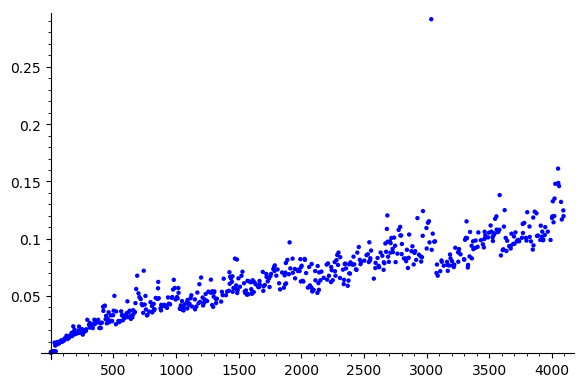

In [9]:
#obtain and plot the list of all primes numbers less than 2^12
l = main()
list_plot(l)